In [28]:
import pandas as pd
import pyodbc

# try tim's *.py program to pull the sql query 
# which should first be stored in a separate file
# See Tim's slack....


In [29]:
#SQl connection
import pyodbc
conn = pyodbc.connect(driver='{SQL Server}',
                      server='rptdb02.aus1.homeaway.live',
                      trusted_connection='yes')

Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'SQL Server' : file not found (0) (SQLDriverConnect)")

In [ ]:
q = """SELECT 
    OnlineBookableListingDateId
    ,DisplayBrandId
    ,SUM(OnlineBookableListingCount)
FROM [DW].[dbo].[VW_CoreKPI_OnlineBookableListingDailyAggregate]
WHERE OnlineBookableListingDateId BETWEEN '2018-08-01' AND '2018-09-01'
AND DisplayBrandId = 321
GROUP BY OnlineBookableListingDateId, DisplayBrandId
ORDER BY OnlineBookableListingDateId;;"""

In [4]:
dfSQL = pd.read_sql(qNA, conn)

NameError: name 'qNA' is not defined

In [ ]:
SELECT 
    BookingDateId
    ,ArrivalDate
    ,DepartureDate
    ,DATEDIFF(dd,ArrivalDate, DepartureDate) as lenghtOfStay
    --,(count(ArrivalDate)/count(BookingDateId)) as stayTiming
    ,city
    ,Country
    ,SUM(AdultNum) as adults
    ,SUM(ChildrenNum) as children
    ,SUM(ChildrenNum) + SUM(AdultNum) as totalParty
    --,ArrivalDate
    ,TransactionalSalesTotalAmountUSD = SUM(psf.SalesAmount * cc.ConversionRate) 
FROM VW_BookingFact as bf
JOIN VW_Reservation as res on bf.ReservationId = res.ReservationId
JOIN VW_Listing as list on bf.ListingId = list.ListingId
JOIN VW_ProjectedSalesFact as psf on res.ReservationId = psf.ReservationId
JOIN VW_Site as s on psf.SiteId = s.SiteId
JOIN VW_ProductCluster as pc on psf.ProductClusterId = pc.ProductClusterId
JOIN VW_CurrencyConversion as cc ON psf.CurrencyConversionIdUSD = cc.CurrencyConversionId 
WHERE BookingDateId BETWEEN '2015-01-01' AND '2016-09-01'
AND ArrivalDate BETWEEN '2015-01-01' AND '2016-01-01'
AND DATEDIFF(dd,ArrivalDate, DepartureDate) <> 0
AND ArrivalDate >= BookingDateId
GROUP BY ArrivalDate, BookingDateId, AdultNum, ChildrenNum, city, Country,DepartureDate
HAVING (SUM(ChildrenNum) + SUM(AdultNum)) <> 0;

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
PATH = '/users/akuppam/documents/Data/RoverData/regions/'

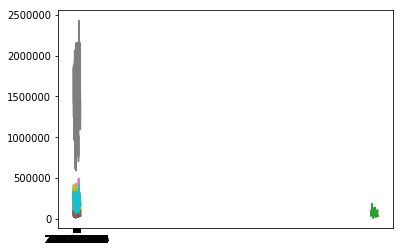

In [19]:
fileNames = os.listdir(PATH)

fileNames = [file for file in fileNames if '.csv' in file]

for file in fileNames:
    df = pd.read_csv(PATH + file, index_col = 0)
    plt.plot(df.visits)

plt.show()

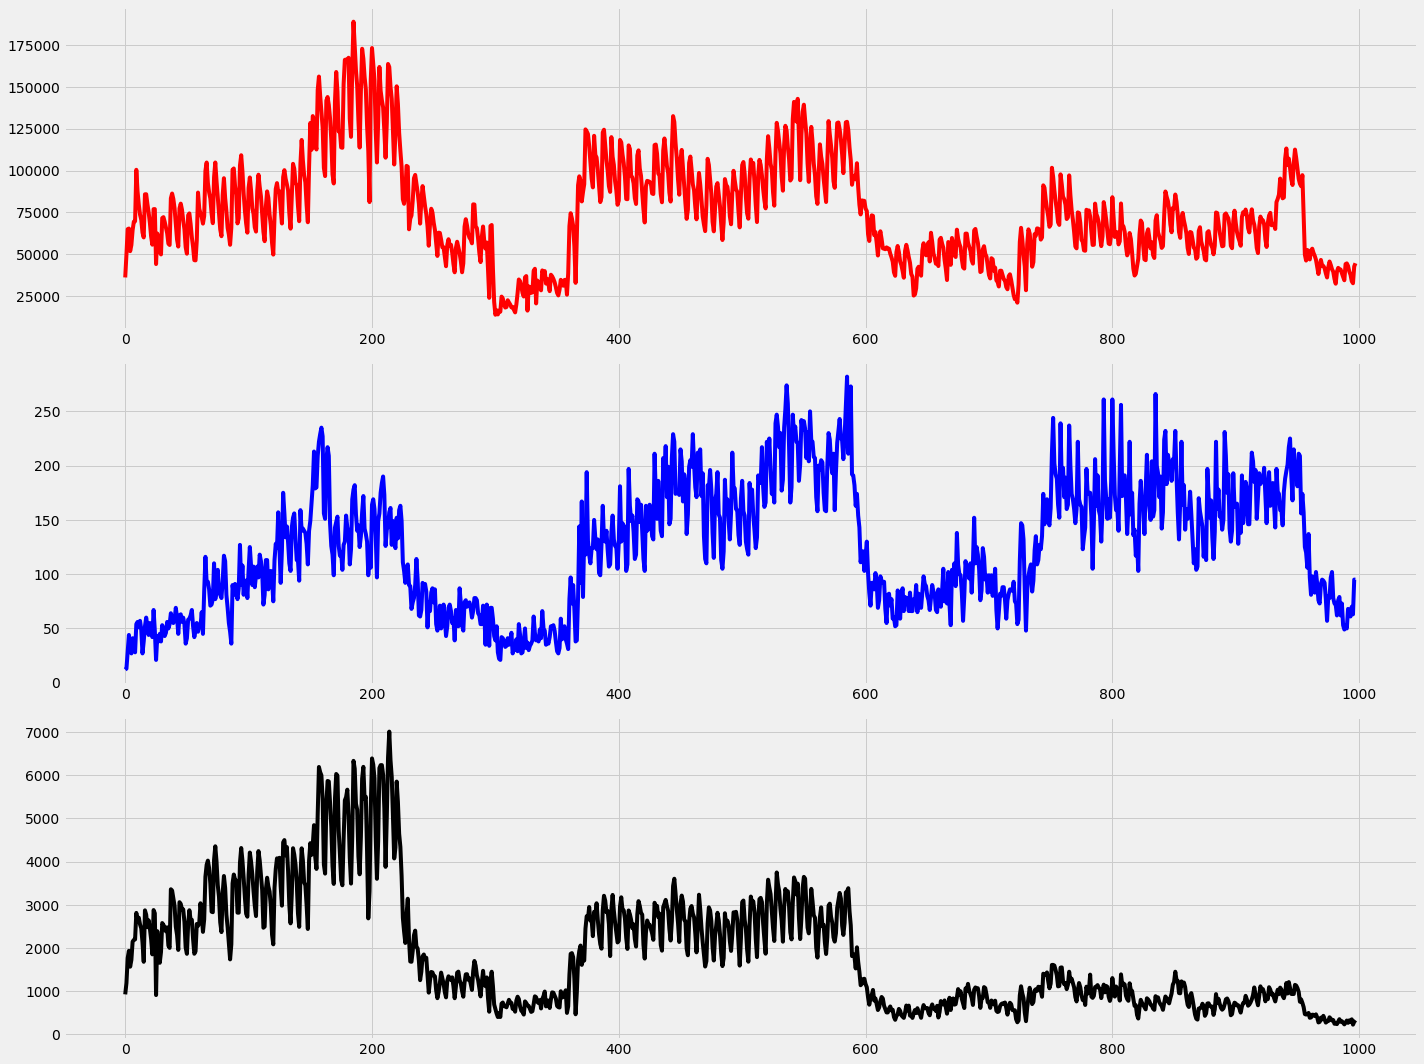

In [20]:
df = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/AMR-paid.csv")
plt.figure(figsize=(20,15))
# (rows, cols, plot#)
plt.subplot(3, 1, 1)
plt.plot(df.visits, color = 'red')
plt.subplot(3, 1, 2)
plt.plot(df.br, color = 'blue')
plt.subplot(3, 1, 3)
plt.plot(df.inq, color = 'black')
plt.tight_layout()

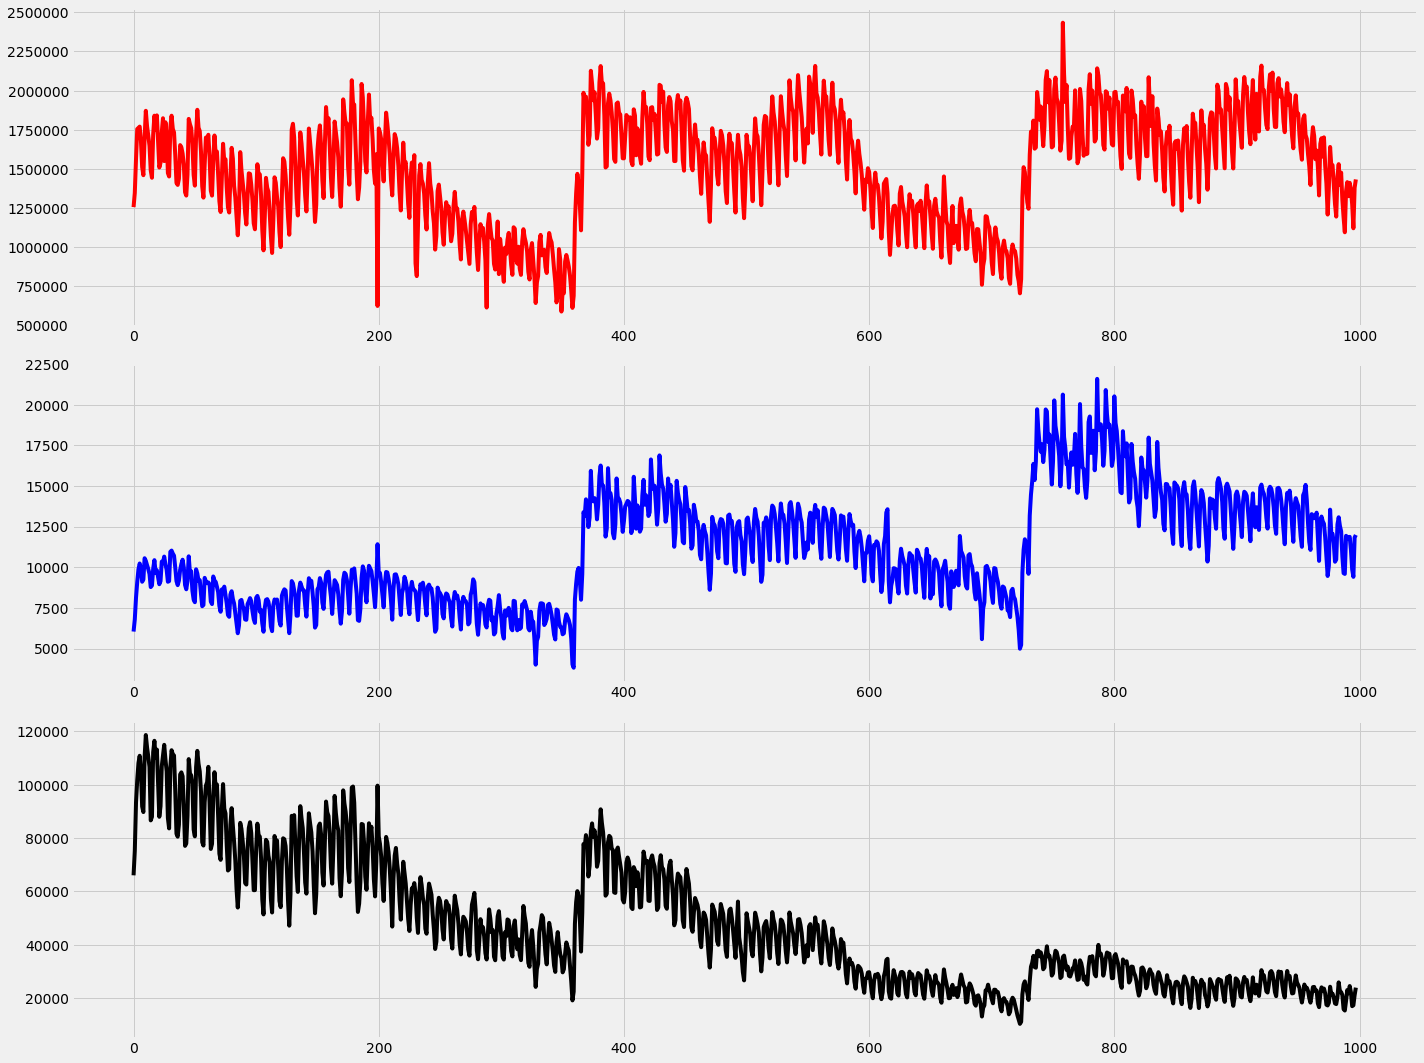

In [21]:
df = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/AMR-nonpaid.csv")
plt.figure(figsize=(20,15))
# (rows, cols, plot#)
plt.subplot(3, 1, 1)
plt.plot(df.visits, color = 'red')
plt.subplot(3, 1, 2)
plt.plot(df.br, color = 'blue')
plt.subplot(3, 1, 3)
plt.plot(df.inq, color = 'black')
plt.tight_layout()

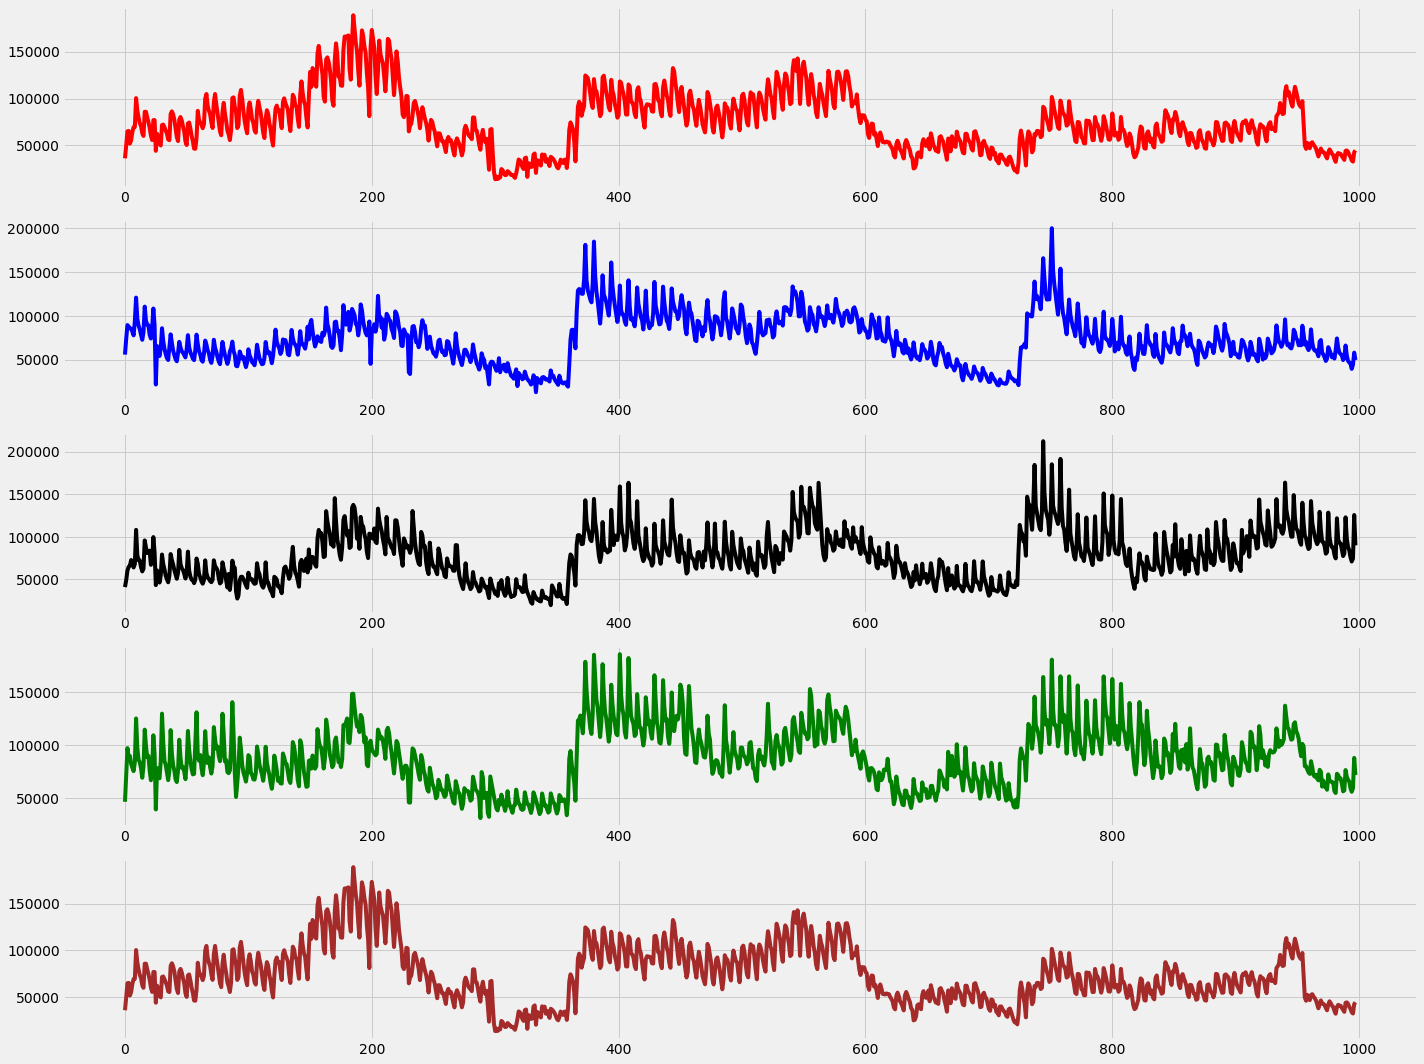

In [23]:
amr_paid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/AMR-paid.csv")
uk_paid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/UK-paid.csv")
ce_paid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/CE-paid.csv")
fr_paid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/FR-paid.csv")
soeu_paid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/SoEu-paid.csv")
plt.figure(figsize=(20,15))
plt.subplot(5, 1, 1)
plt.plot(amr_paid.visits, color = 'red')
plt.subplot(5, 1, 2)
plt.plot(uk_paid.visits, color = 'blue')
plt.subplot(5, 1, 3)
plt.plot(ce_paid.visits, color = 'black')
plt.subplot(5, 1, 4)
plt.plot(fr_paid.visits, color = 'green')
plt.subplot(5, 1, 5)
plt.plot(soeu_paid.visits, color = 'brown')
plt.tight_layout()

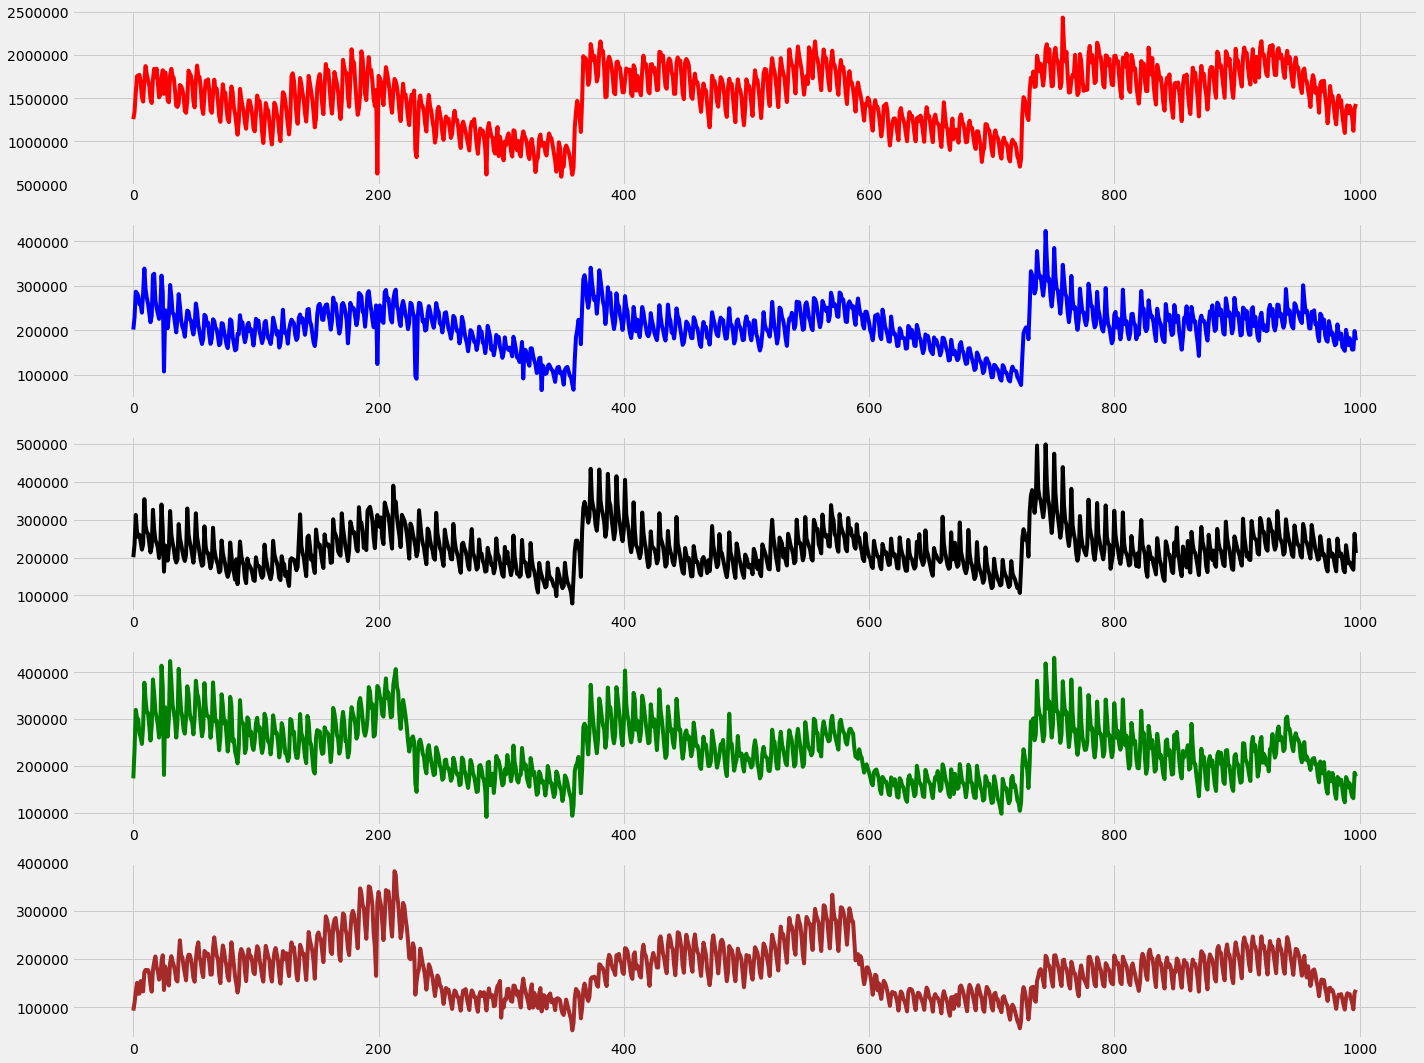

In [24]:
amr_nonpaid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/AMR-nonpaid.csv")
uk_nonpaid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/UK-nonpaid.csv")
ce_nonpaid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/CE-nonpaid.csv")
fr_nonpaid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/FR-nonpaid.csv")
soeu_nonpaid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/SoEu-nonpaid.csv")
plt.figure(figsize=(20,15))
plt.subplot(5, 1, 1)
plt.plot(amr_nonpaid.visits, color = 'red')
plt.subplot(5, 1, 2)
plt.plot(uk_nonpaid.visits, color = 'blue')
plt.subplot(5, 1, 3)
plt.plot(ce_nonpaid.visits, color = 'black')
plt.subplot(5, 1, 4)
plt.plot(fr_nonpaid.visits, color = 'green')
plt.subplot(5, 1, 5)
plt.plot(soeu_nonpaid.visits, color = 'brown')
plt.tight_layout()

In [ ]:
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 2)
plt.tight_layout()

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

In [27]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

amr_paid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/AMR-paid.csv")
amr_paid = sns.load_dataset("amr_paid")
ax = sns.lineplot(x="date", y="visits", data=amr_paid)

HTTPError: HTTP Error 404: Not Found

In [ ]:
amr_paid = pd.read_csv("/users/akuppam/documents/Data/RoverData/regions/AMR-paid.csv")

In [4]:
rnbl2 = pd.read_csv("/users/akuppam/documents/Data/RoverData/rnbl2.csv")
rnbl2.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings,date1
0,2016-01-01,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216,42370.0
1,2016-01-01,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795,42370.0
2,2016-01-01,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696,42370.0
3,2016-01-01,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424,42370.0
4,2016-01-01,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480,42370.0


In [5]:
rnbl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 13 columns):
date         9980 non-null object
region       9980 non-null object
marketing    9980 non-null object
visits       9980 non-null int64
br           9980 non-null int64
inq          9980 non-null int64
gb           9980 non-null int64
cb           9980 non-null int64
nb           9980 non-null int64
ss           9980 non-null float64
ts           9980 non-null float64
listings     9980 non-null int64
date1        9980 non-null float64
dtypes: float64(3), int64(7), object(3)
memory usage: 1013.7+ KB


In [6]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [7]:
rnbl2["reg_mrkt"] = rnbl2['region'].str.cat(rnbl2['marketing'], sep='_')
rnbl2["reg_mrkt1"] = rnbl2["reg_mrkt"].astype('category')
rnbl2.dtypes
rnbl2["reg_mrkt1"] = rnbl2["reg_mrkt1"].cat.codes
rnbl2.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings,date1,reg_mrkt,reg_mrkt1
0,2016-01-01,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216,42370.0,AMR_NotPaid,0
1,2016-01-01,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795,42370.0,AMR_Paid,1
2,2016-01-01,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696,42370.0,UK_NotPaid,8
3,2016-01-01,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424,42370.0,UK_Paid,9
4,2016-01-01,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480,42370.0,CE_NotPaid,2


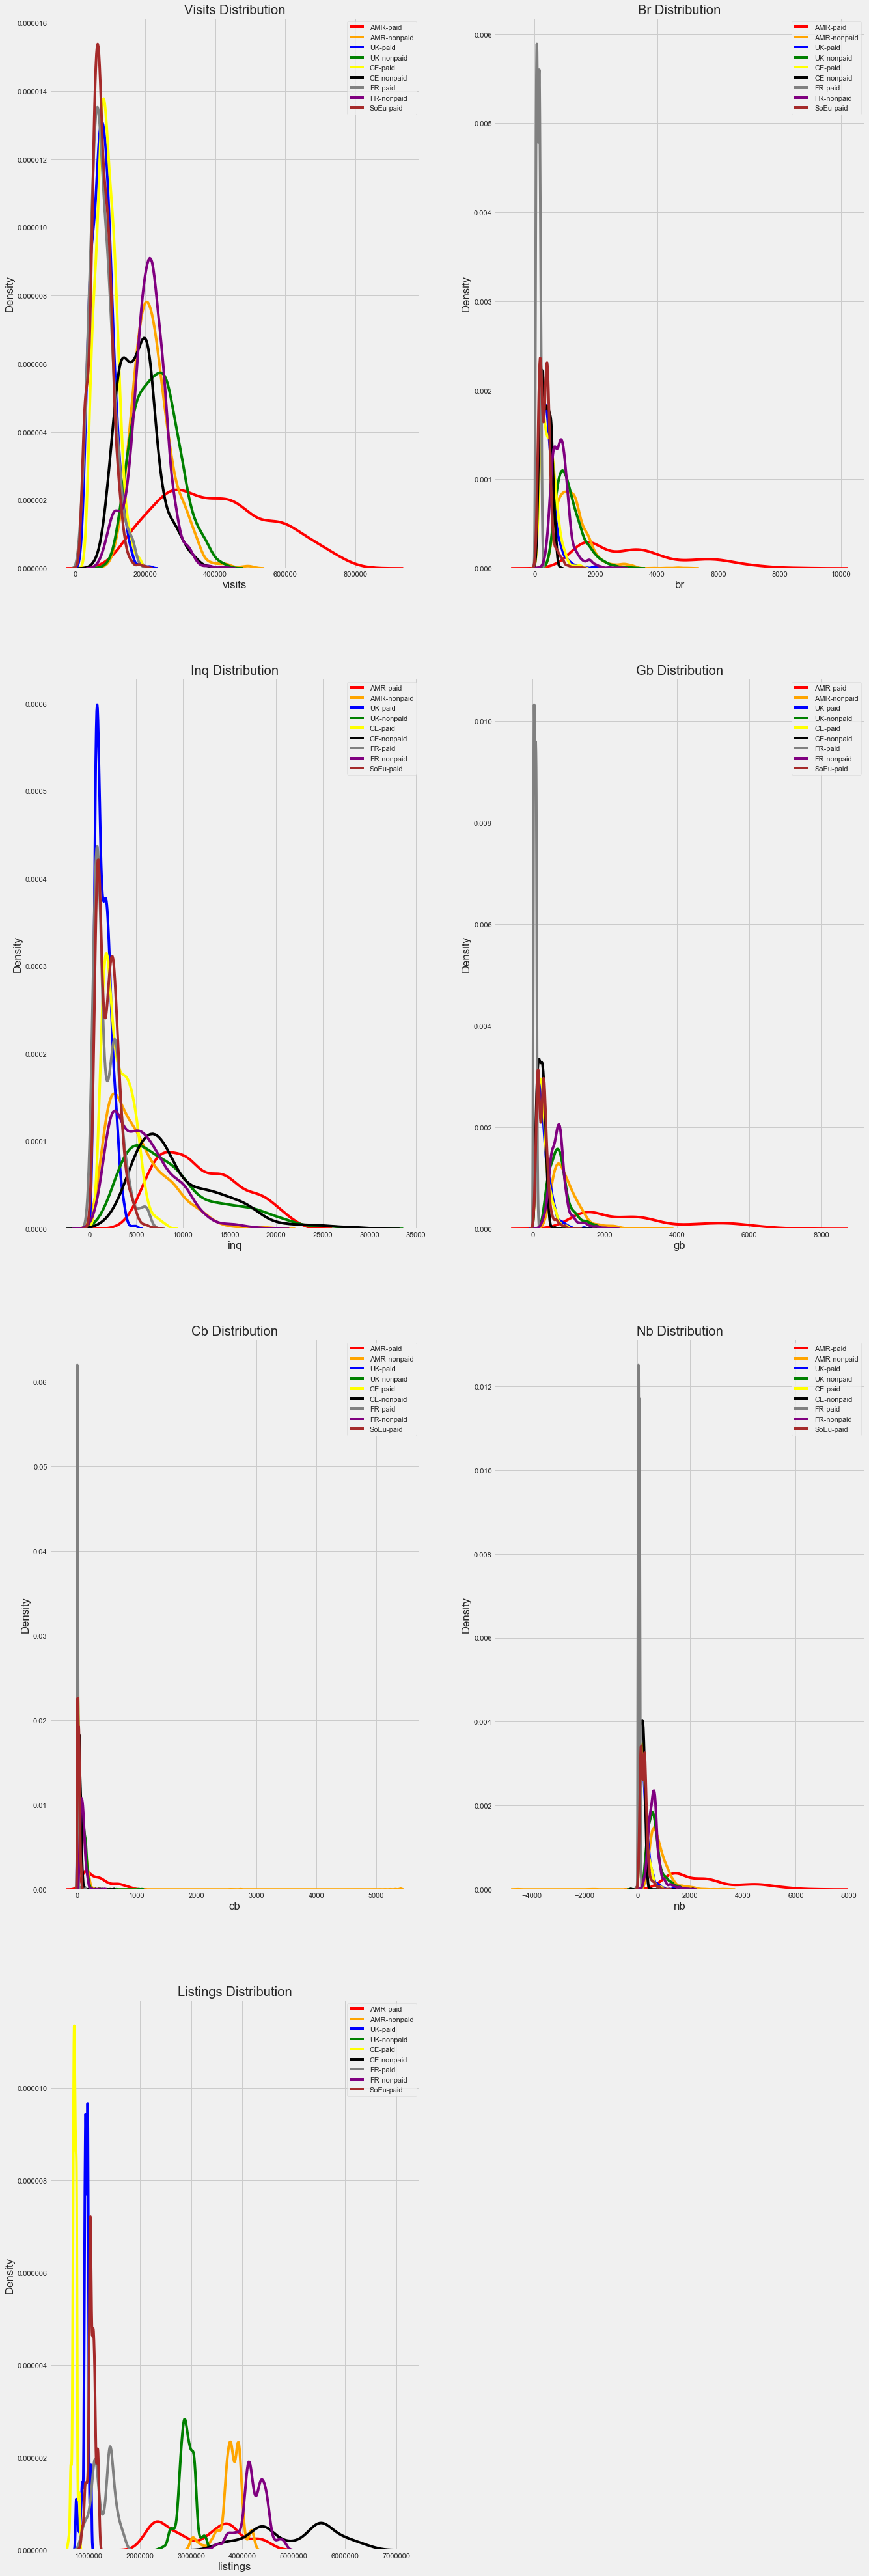

In [43]:
from collections import OrderedDict

plt.figure(figsize = (20, 28))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green',
                     5: 'yellow', 6: 'black', 7: 'grey', 8: 'purple',
                     9: 'brown', 10: 'pink'})
region_mapping = OrderedDict({1: 'AMR-paid', 2: 'AMR-nonpaid', 3: 'UK-paid', 4: 'UK-nonpaid',
                              5: 'CE-paid', 6: 'CE-nonpaid', 7: 'FR-paid', 8: 'FR-nonpaid',
                              9: 'SoEu-paid', 10: 'SoEu-nonpaid'})

# rover['vi'] = rover['vi'].astype(np.float64)

# Iterate through the float columns
for i, col in enumerate(rnbl2.select_dtypes('int')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the RLT marketing channels
    for regions, color in colors.items():
        # Plot each marketing channel as a separate line
        sns.kdeplot(rnbl2.loc[rnbl2['reg_mrkt1'] == regions, col].dropna(), 
                    ax = ax, color = color, label = region_mapping[regions])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [42]:
rnbl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 15 columns):
date         9980 non-null object
region       9980 non-null object
marketing    9980 non-null object
visits       9980 non-null int64
br           9980 non-null int64
inq          9980 non-null int64
gb           9980 non-null int64
cb           9980 non-null int64
nb           9980 non-null int64
ss           9980 non-null float64
ts           9980 non-null float64
listings     9980 non-null int64
date1        9980 non-null float64
reg_mrkt     9980 non-null object
reg_mrkt1    9980 non-null int8
dtypes: float64(3), int64(7), int8(1), object(4)
memory usage: 1.1+ MB


In [8]:
rnbl2.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings,date1,reg_mrkt,reg_mrkt1
0,2016-01-01,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216,42370.0,AMR_NotPaid,0
1,2016-01-01,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795,42370.0,AMR_Paid,1
2,2016-01-01,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696,42370.0,UK_NotPaid,8
3,2016-01-01,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424,42370.0,UK_Paid,9
4,2016-01-01,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480,42370.0,CE_NotPaid,2


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


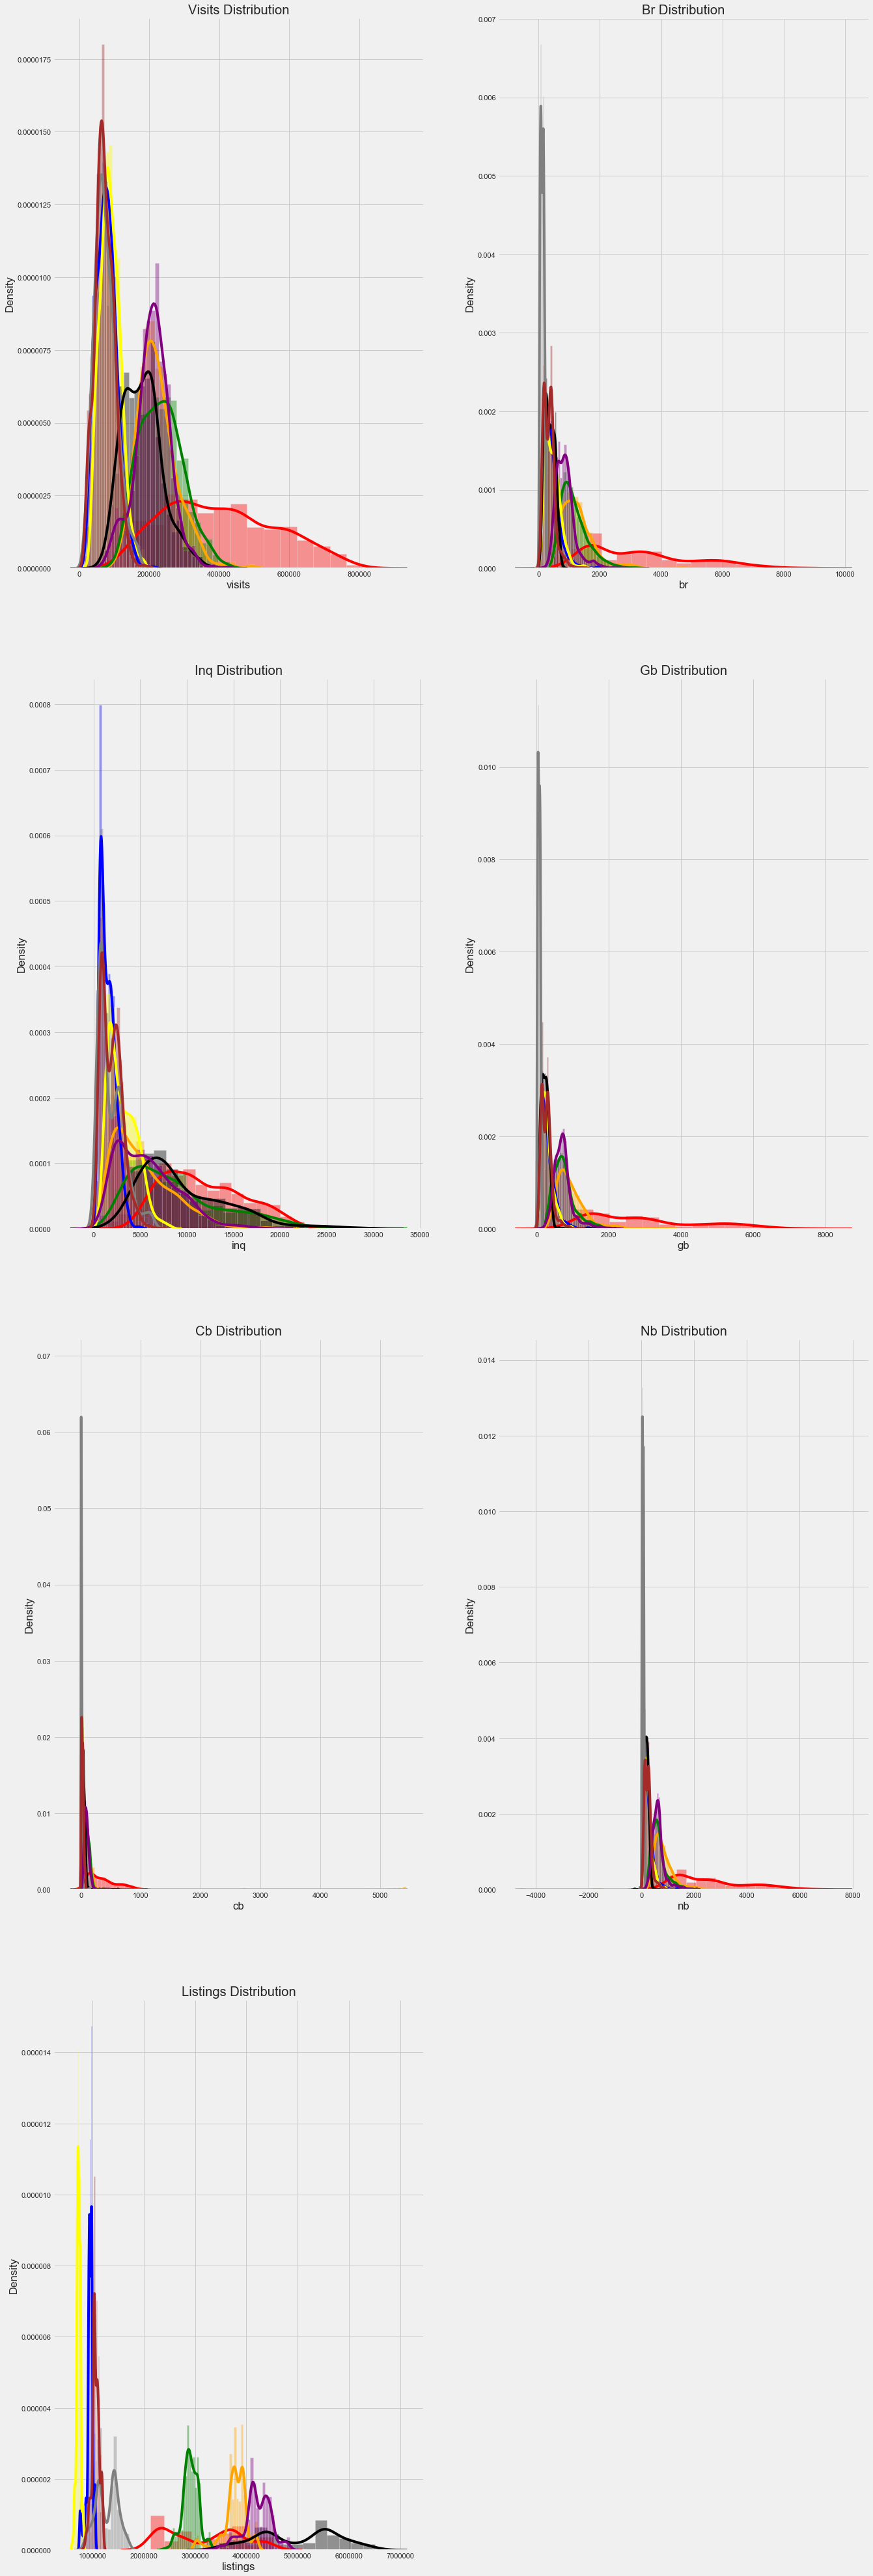

In [44]:
from collections import OrderedDict

plt.figure(figsize = (20, 28))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green',
                     5: 'yellow', 6: 'black', 7: 'grey', 8: 'purple',
                     9: 'brown', 10: 'pink'})
region_mapping = OrderedDict({1: 'AMR-paid', 2: 'AMR-nonpaid', 3: 'UK-paid', 4: 'UK-nonpaid',
                              5: 'CE-paid', 6: 'CE-nonpaid', 7: 'FR-paid', 8: 'FR-nonpaid',
                              9: 'SoEu-paid', 10: 'SoEu-nonpaid'})

# rover['vi'] = rover['vi'].astype(np.float64)

# Iterate through the float columns
for i, col in enumerate(rnbl2.select_dtypes('int')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the RLT marketing channels
    for regions, color in colors.items():
        # Plot each marketing channel as a separate line
        sns.distplot(rnbl2.loc[rnbl2['reg_mrkt1'] == regions, col].dropna(), 
                    ax = ax, color = color, label = region_mapping[regions])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [ ]:
from collections import OrderedDict

plt.figure(figsize = (20, 28))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green',
                     5: 'yellow', 6: 'black', 7: 'grey', 8: 'purple',
                     9: 'brown', 10: 'pink'})
region_mapping = OrderedDict({1: 'AMR-paid', 2: 'AMR-nonpaid', 3: 'UK-paid', 4: 'UK-nonpaid',
                              5: 'CE-paid', 6: 'CE-nonpaid', 7: 'FR-paid', 8: 'FR-nonpaid',
                              9: 'SoEu-paid', 10: 'SoEu-nonpaid'})

# rover['vi'] = rover['vi'].astype(np.float64)

# Iterate through the float columns
for i, col in enumerate(rnbl2.select_dtypes('int')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the RLT marketing channels
    for regions, color in colors.items():
        # Plot each marketing channel as a separate line
        sns.lineplot(x = rnbl2['date'], y = rnbl2[col], 
                    ax = ax, color = color, label = region_mapping[regions])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

KeyboardInterrupt: 

In [10]:
rnbl2["region"] = rnbl2["region"].astype('category')
rnbl2["reg_cat"] = rnbl2["region"].cat.codes
rnbl2.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings,date1,reg_mrkt,reg_mrkt1,reg_cat
0,2016-01-01,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216,42370.0,AMR_NotPaid,0,0
1,2016-01-01,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795,42370.0,AMR_Paid,1,0
2,2016-01-01,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696,42370.0,UK_NotPaid,8,4
3,2016-01-01,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424,42370.0,UK_Paid,9,4
4,2016-01-01,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480,42370.0,CE_NotPaid,2,1


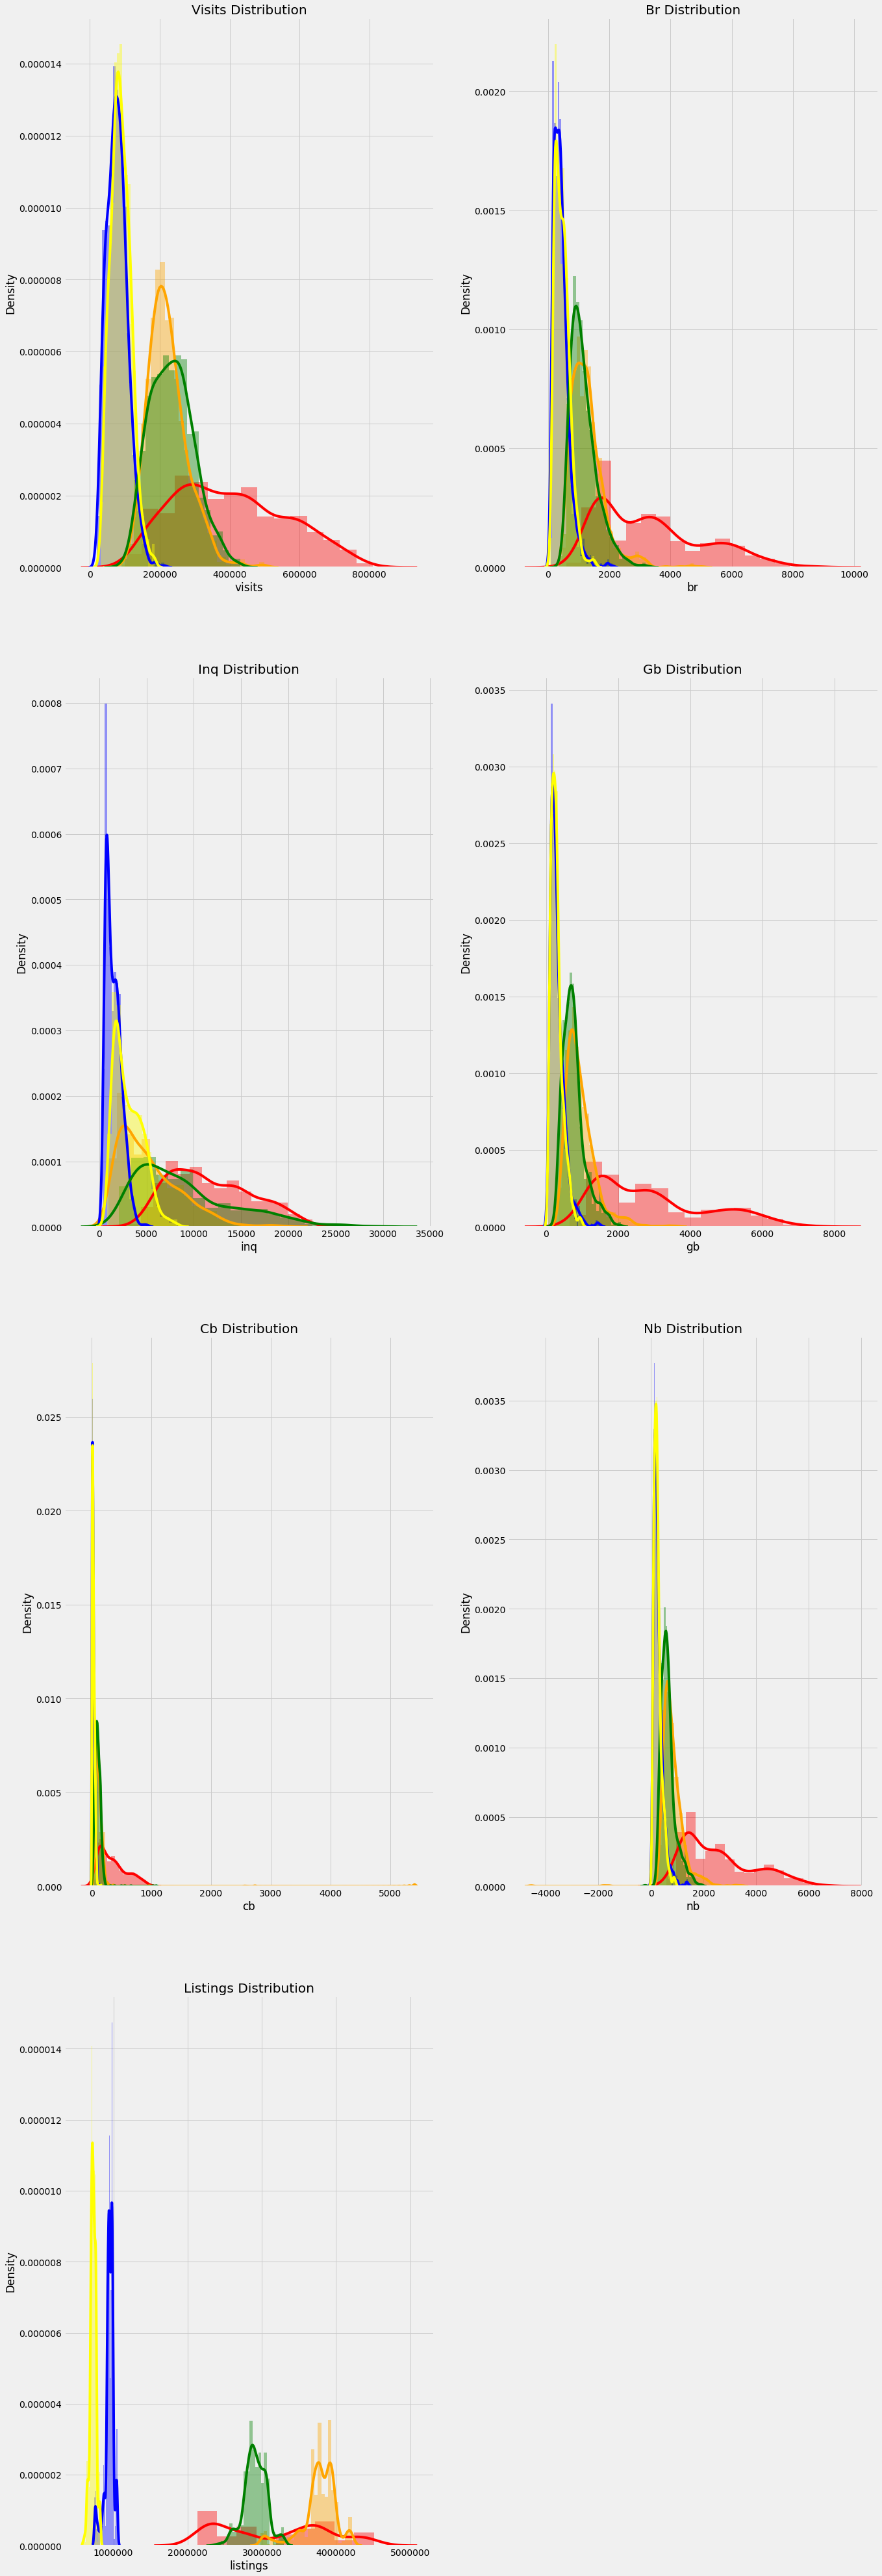

In [11]:
from collections import OrderedDict

plt.figure(figsize = (20, 28))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green', 5: 'yellow'})
region_mapping = OrderedDict({1: 'AMR', 2: 'UK', 3: 'CE', 4: 'FR', 5: 'SoEu'})

# rover['vi'] = rover['vi'].astype(np.float64)

# Iterate through the float columns
for i, col in enumerate(rnbl2.select_dtypes('int')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the RLT marketing channels
    for regions, color in colors.items():
        # Plot each marketing channel as a separate line
        sns.distplot(rnbl2.loc[rnbl2['reg_mrkt1'] == regions, col].dropna(), 
                    ax = ax, color = color, label = region_mapping[regions])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)